### Options Pricing via Black-Scholes

The following code will calculate the price of a call and a put option based on: 

* Current Stock Price
* Time to Expiry
* Strike Price of the option
* Volatility of the Stock
* Rate of risk-free Return

The equation for the price of a Call option and a Put option using B-S is:
$$C = SN\left(d_1\right) - Ee^{-r\left(T-t\right)}N\left(d_2\right)$$

$$P = -SN\left(-d_1\right) + Ee^{-r\left(T-t\right)}N\left(-d_2\right)$$

Where $d_1$, $d_2$ and $N(x)$ are as such:

$$d_1 = \frac{log\left(\frac{S}{E}\right) + \left(r + \frac{1}{2}\sigma^2\right)\left(T-t\right)}{\sigma\sqrt{T-t}}$$

$$d_2 = \frac{log\left(\frac{S}{E}\right) + \left(r - \frac{1}{2}\sigma^2\right)\left(T-t\right)}{\sigma\sqrt{T-t}}$$

$$N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{\frac{-1}{2}\phi^2}d\phi$$


In [1]:
from statistics import NormalDist as N
import math 

def black_scholes(S,t,E,vol,r):

    norm = N(0,1)
    d_1 = (math.log(S/E) + (r + 0.5*vol**2)*t)/(vol*math.sqrt(t))
    d_2 = d_1 - vol * math.sqrt(t)
    C = S*norm.cdf(d_1) - E*math.exp(-r*t)*norm.cdf(d_2)
    P = -S*norm.cdf(-d_1) + E*math.e**(-r*t)*norm.cdf(-d_2)
    return(round(C,6),round(P,6))



In [2]:
S = 100       # Stock price
E = 100       # Strike price
t = 1         # Time to maturity (in years)
vol = 0.2     # Volatility
r = 0.05      # Risk-free rate

call_price,put_price = black_scholes(S, t, E, vol, r)
print(f'The price of a Call Option is: ${round(call_price,2)}, \nThe price of a Put Option is: ${round(put_price,2)}')


The price of a Call Option is: $10.45, 
The price of a Put Option is: $5.57


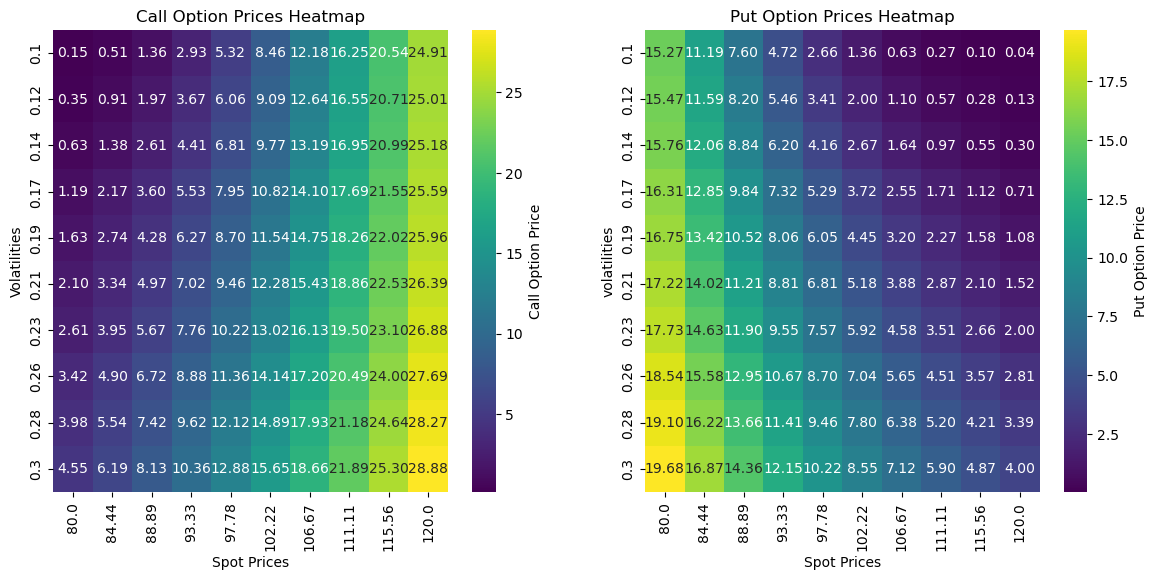

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interactive, FloatSlider, FloatRangeSlider
from IPython.display import display

def heat_map(vol_range,spot_range):
    min_vol, max_vol = vol_range
    min_spot, max_spot = spot_range 
    volatilities = np.linspace(min_vol,max_vol,10,endpoint=True).round(2)
    spots = np.linspace(min_spot,max_spot,10,endpoint=True).round(2)

    call_grid = [[black_scholes(x,t,E,y,r)[0] for x in spots] for y in volatilities]
    put_grid =  [[black_scholes(x,t,E,y,r)[1] for x in spots] for y in volatilities]

    call_grid = pd.DataFrame(call_grid, columns=spots, index = volatilities)
    put_grid = pd.DataFrame(put_grid, columns=spots, index = volatilities)
    
    f, (ax1,ax2) = plt.subplots(1,2,figsize = (14,6))
    g1 = sns.heatmap(call_grid, cbar_kws={'label':'Call Option Price'}, cmap= 'viridis', annot=True, fmt = '.2f', ax = ax1)
    g1.set_xlabel('Spot Prices')
    g1.set_ylabel('Volatilities')
    g1.set_title('Call Option Prices Heatmap')
    g2 = sns.heatmap(put_grid,  cbar_kws={'label':'Put Option Price'}, cmap= 'viridis', annot=True, fmt = '.2f', ax = ax2)
    g2.set_xlabel('Spot Prices')
    g2.set_ylabel('volatilities')
    g2.set_title('Put Option Prices Heatmap')
    plt.show()


S = 100
E = 100
t = 1
r = 0.05

interactive_heatmap = interactive(
    heat_map,
    vol_range = FloatRangeSlider(value = [0.1,0.3], min = 0.01, max = 1.0, step = 0.01,
                                 description = 'Volatility Range', continuous_update = False),
    spot_range = FloatRangeSlider(value = [80,120], min = 50, max = 150, step = 5,
                                 description = 'Spot Price Range', continuous_update = False) 
)

#display(interactive_heatmap)

heat_map(vol_range=(0.1,0.3),spot_range=(80,120))

We will now explore the greeks for vanilla call and put options. Greeks are defined as the sensitivity in the price of the contract subject to a change in any one of the input variables. The following are common greeks that are useful:

$$ \Delta = \frac{\partial}{\partial S}$$

$$ \Gamma = \frac{\partial^2}{\partial S^2}$$

$$ \Theta = \frac{\partial}{\partial t}$$

$$ \text{Vega} = \frac{\partial}{\partial \sigma}$$

$$ \rho = \frac{\partial}{\partial r}$$

We will plot the above greeks

In [5]:
import math
from statistics import NormalDist as N

def delta(S,t,E,vol,r):
    d_1 = (math.log(S/E) + (r + 0.5*vol**2)*t)/(vol*math.sqrt(t))
    call_delta = N(mu = 0, sigma = 1).cdf(float(d_1))
    put_delta = call_delta - 1
    return(call_delta,put_delta)

def gamma(S,t,E,vol,r):
    d_1 = (math.log(S/E) + (r + 0.5*vol**2)*t)/(vol*math.sqrt(t))
    call_gamma = (math.exp(-0.5 * d_1**2))/(S*vol*math.sqrt(t)*math.sqrt(2*math.pi))
    put_gamma = call_gamma
    return(call_gamma, put_gamma)

def theta(S,t,E,vol,r):
    d_1 = (math.log(S/E) + (r + 0.5*vol**2)*t)/(vol*math.sqrt(t))
    d_2 = d_1 - vol*math.sqrt(t)
    call_theta = -E*r*math.exp(-r*t)*N(0,1).cdf(d_2) - (S*vol*math.exp(-0.5*d_1**2))/(2*math.sqrt(2*math.pi*t))
    put_theta = call_theta + r*E*math.exp(-r*t)
    return(call_theta,put_theta)

def vega(S,t,E,vol,r):
    d_1 = (math.log(S/E) + (r + 0.5*vol**2)*t)/(vol*math.sqrt(t))
    call_vega = (S*math.exp(-0.5*d_1**2)*math.sqrt(t))/(math.sqrt(2*math.pi))
    put_vega = call_vega
    return(call_vega,put_vega)

def rho(S,t,E,vol,r):
    d_1 = (math.log(S/E) + (r + 0.5*vol**2)*t)/(vol*math.sqrt(t))
    d_2 = d_1 - vol*math.sqrt(t)
    call_rho = t*E*math.exp(-r*t)*N(0,1).cdf(d_2)
    put_rho = call_rho - t*E*math.exp(-r*t)
    return(call_rho,put_rho)

In [7]:
def plot_greeks(S,t,E,vol,r):
    dt = np.linspace(t,1e-6,num = 100,endpoint=True)
    dS = np.linspace(0.75*S,1.25*S, num = 100, endpoint = True)
    dv = np.linspace(0.75*vol,1.25*vol,num=100,endpoint = True)
    dr = np.linspace(0.75*r,1.25*r,num = 100, endpoint = True)

    greeks = {'Delta':delta,'Gamma':gamma,'Theta':theta,'Vega':vega,'Rho':rho}
    increments = {'Delta': ('S',dS),'Gamma':('S',dS),'Theta':('t',dt),'Vega':('vol',dv),'Rho':('r',dS)}
    labels = {'S':'Stock Price','t': 'Time to Expiry','vol':'Volatility of Underlying','r':'Stock Price'}

    call_greeks = {}
    put_greeks = {}

    call_price = [black_scholes(x,t,E,vol,r)[0] for x in dS]
    put_price = [black_scholes(x,t,E,vol,r)[1] for x in dS]

    for greek_name, greek_function in greeks.items():
        para_name,para_range = increments[greek_name]
        if para_name == 'S':
            call_greeks[greek_name] = [greek_function(x,t,E,vol,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(x,t,E,vol,r)[1] for x in para_range]
        elif para_name == 't':
            call_greeks[greek_name] = [greek_function(S,x,E,vol,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(S,x,E,vol,r)[1] for x in para_range]
        elif para_name == 'vol':
            call_greeks[greek_name] = [greek_function(S,t,E,x,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(S,t,E,x,r)[1] for x in para_range]
        elif para_name == 'r':
            call_greeks[greek_name] = [greek_function(x,t,E,vol,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(x,t,E,vol,r)[1] for x in para_range]
    
    i=1

    f, ax = plt.subplots(6,2,figsize = (14,30))    

    ax[0,0].plot(dS,call_price)
    ax[0,0].set_title('Call Option Price')
    ax[0,0].set_xlabel('Stock Price')
    ax[0,0].set_ylabel('Price')
    ax[0,0].axvline(x = E, color = 'red', linestyle = '--', ymin = 0, ymax = max(call_price))
    ax[0,1].plot(dS,put_price)
    ax[0,1].set_title('Put Option Price')
    ax[0,1].set_xlabel('Stock Price')
    ax[0,1].set_ylabel('Price')
    ax[0,1].axvline(x = E, ymin = 0, ymax = max(put_price), color = 'red', linestyle = '--')

    for greeks in greeks.keys():
        para_name,para_range = increments[greeks]
        ax[i,0].plot(para_range,call_greeks[greeks])
        ax[i,0].set_title(f'Call Option {greeks}')
        ax[i,0].set_xlabel(labels[para_name])
        ax[i,0].set_ylabel(greeks)
        ax[i,1].plot(para_range,put_greeks[greeks])
        ax[i,1].set_title(f'Put Option {greeks}')
        ax[i,1].set_xlabel(labels[para_name])
        ax[i,1].set_ylabel(greeks)
        if greeks == 'Delta' or greeks == 'Gamma':
            ax[i,0].axvline(x = E, color = 'red', linestyle = '--')
            ax[i,1].axvline(x = E, color = 'red', linestyle = '--')
        if greeks == 'Theta':
            ax[i,0].set_xlim(t,0)
            ax[i,1].set_xlim(t,0)
        i += 1



    plt.tight_layout()
    plt.show()

S = 100
E = 100
t = 1
r = 0.05
vol = 0.2


#plot_greeks(S,t,E,vol,r)

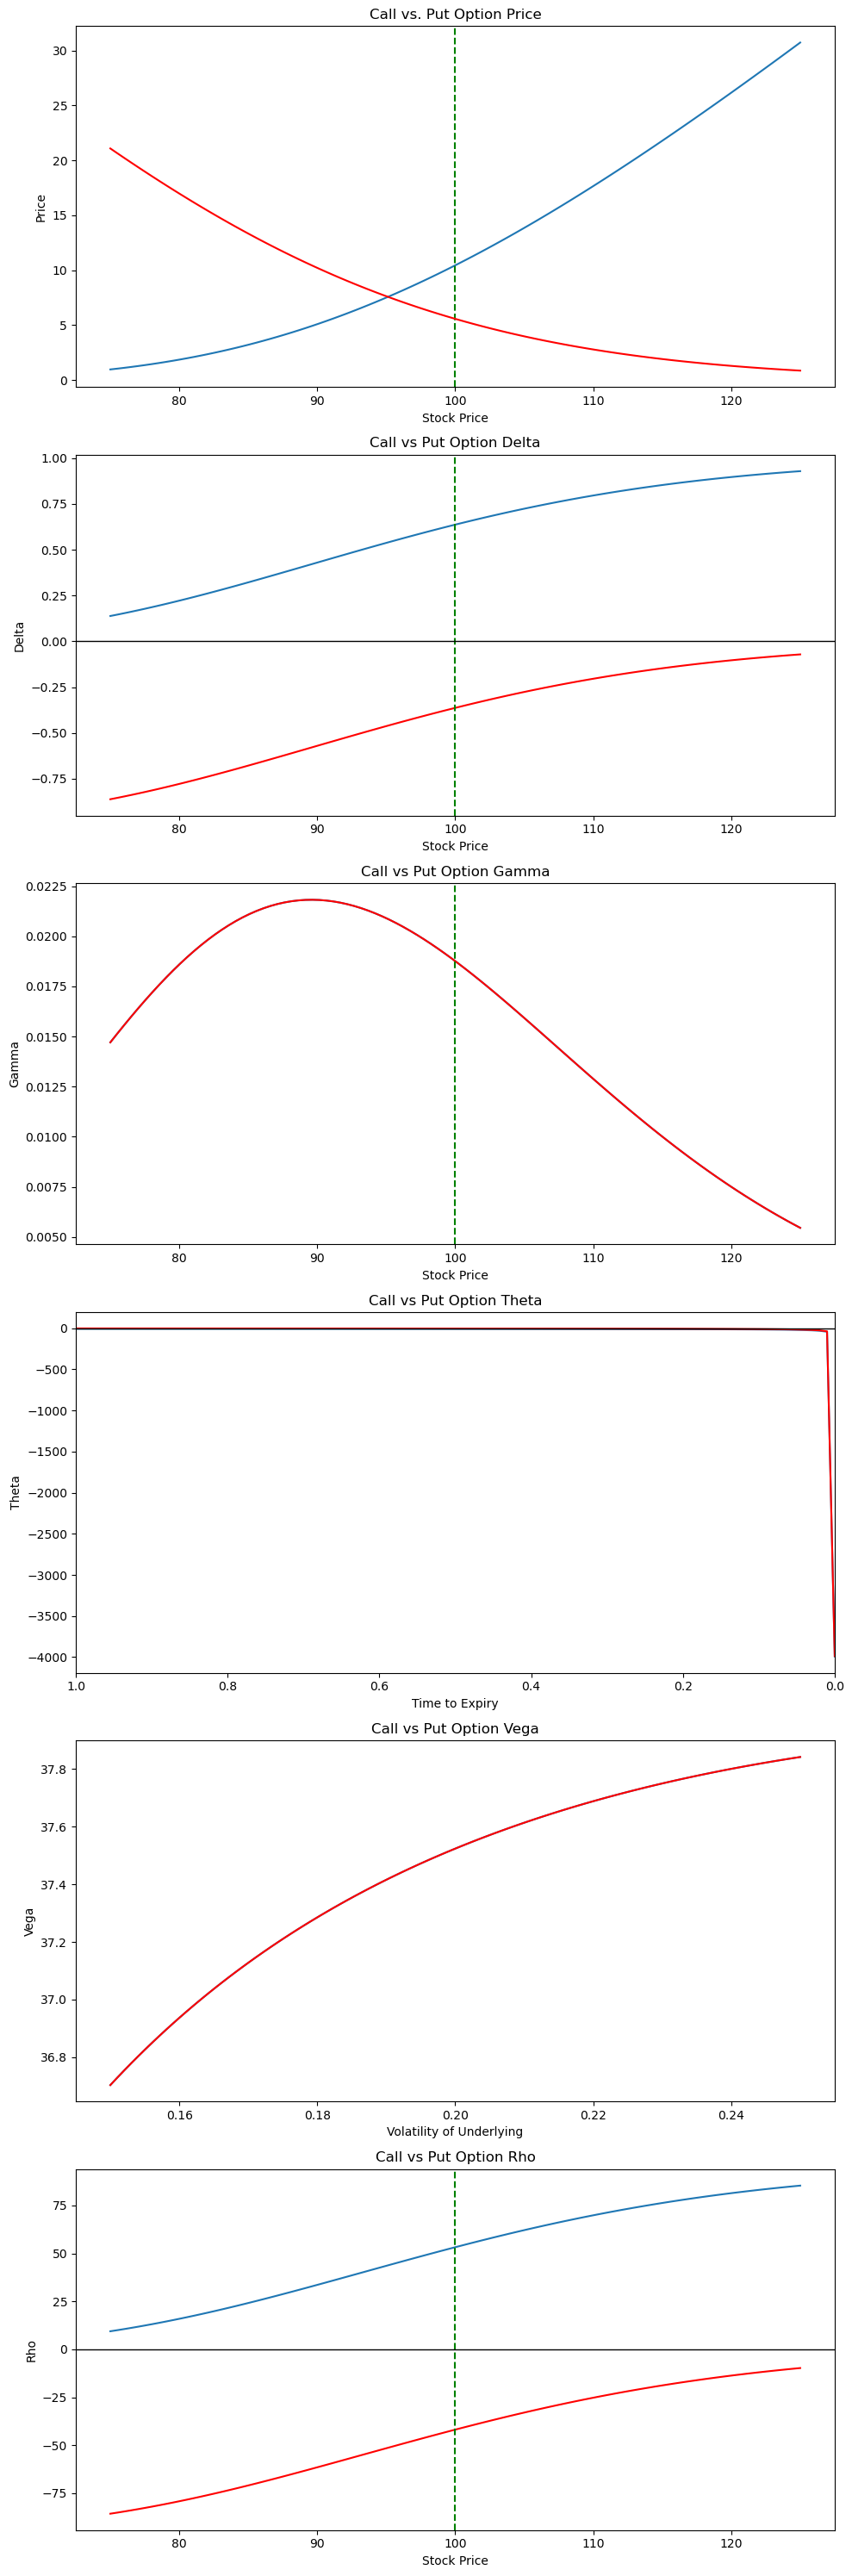

In [10]:
from ipywidgets import interactive, FloatSlider
from IPython.display import display

def plot_greeks2(S,t,E,vol,r):

    ## Creates the increments for each variable of the B-S formula 

    dt = np.linspace(t,1e-6,num = 100,endpoint=True)
    dS = np.linspace(0.75*S,1.25*S, num = 100, endpoint = True)
    dv = np.linspace(0.75*vol,1.25*vol,num=100,endpoint = True)
    dr = np.linspace(0.75*r,1.25*r,num = 100, endpoint = True)

    ## Creates dictionaries to make repetition of plots easier

    greeks = {'Delta':delta,'Gamma':gamma,'Theta':theta,'Vega':vega,'Rho':rho}
    increments = {'Delta': ('S',dS),'Gamma':('S',dS),'Theta':('t',dt),'Vega':('vol',dv),'Rho':('r',dS)}
    labels = {'S':'Stock Price','t': 'Time to Expiry','vol':'Volatility of Underlying','r':'Stock Price'}

    ## Creates empty dictionaries for the greeks of each corresponding contract with the keys being the greeks

    call_greeks = {}
    put_greeks = {}

    ## Lists of the changes in the options prices for changes in the underlying price. This is useful to compare with

    call_price = [black_scholes(x,t,E,vol,r)[0] for x in dS]
    put_price = [black_scholes(x,t,E,vol,r)[1] for x in dS]

    ## Adds the keys and values to the call_greeks and put_greeks dictionaries. As dynamic parameter iteration does not exist
    ## this is how we loop   

    for greek_name, greek_function in greeks.items():
        para_name,para_range = increments[greek_name]
        if para_name == 'S':
            call_greeks[greek_name] = [greek_function(x,t,E,vol,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(x,t,E,vol,r)[1] for x in para_range]
        elif para_name == 't':
            call_greeks[greek_name] = [greek_function(S,x,E,vol,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(S,x,E,vol,r)[1] for x in para_range]
        elif para_name == 'vol':
            call_greeks[greek_name] = [greek_function(S,t,E,x,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(S,t,E,x,r)[1] for x in para_range]
        elif para_name == 'r':
            call_greeks[greek_name] = [greek_function(x,t,E,vol,r)[0] for x in para_range]
            put_greeks[greek_name] = [greek_function(x,t,E,vol,r)[1] for x in para_range]
    
    ## The plot creating will make 6 rows of plots and have the call and put plots on the same figure.
    ## If the plot involves the stock price then the strike price is also indicated in the plot.

    f, ax = plt.subplots(6,1,figsize = (10,30))    

    ax[0].plot(dS,call_price)
    ax[0].set_title('Call vs. Put Option Price')
    ax[0].set_xlabel('Stock Price')
    ax[0].set_ylabel('Price')
    ax[0].axvline(x = E, color = 'green', linestyle = '--', ymin = 0, ymax = max(call_price))
    ax[0].plot(dS,put_price,color  = 'red')

    i=1

    for greeks in greeks.keys():
        para_name,para_range = increments[greeks]
        ax[i].plot(para_range,call_greeks[greeks], label = 'Call')
        ax[i].plot(para_range,put_greeks[greeks], color = 'red', label = 'Put')
        ax[i].set_title(f'Call vs Put Option {greeks}')
        ax[i].set_xlabel(labels[para_name])
        ax[i].set_ylabel(greeks)


        if all(para_range == dS):
            ax[i].axvline(x = E, color = 'green', linestyle = '--')

        if greeks == 'Theta':
            ax[i].set_xlim(t,0)

        if min(call_greeks[greeks]) < 0 or min(put_greeks[greeks]) < 0:
            ax[i].axhline(y = 0, color = 'black', linestyle = '-', linewidth = 1)
        i += 1



    plt.tight_layout()
    plt.show()

## The following creates sliders for all the input values of our function plot_greeks2

interactive_plot = interactive(
    plot_greeks2,
    S = FloatSlider(value = 100, min = 0, max = 200, step = 5, description = 'Stock Price (S)'),
    t = FloatSlider(value = 1, min = 0.1, max = 2, step = 0.1, description = 'Time to Expiry (t)'),
    E = FloatSlider(value = 100, min = 10, max = 200, step = 5, description = 'Strike Price (E)'),
    vol = FloatSlider(value = 0.2, min = 0.1, max = 0.5, step = 0.01, description = 'Volatility (vol)'),
    r = FloatSlider(value = 0.05, min = 0.01, max = 0.1, step = 0.005, description = 'Risk-Free Rate(r)')
)



S = 100
E = 100
t = 1
r = 0.05
vol = 0.2


#display(interactive_plot)

plot_greeks2(S,t,E,vol,r)